In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,Cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [3]:
df.rename(str.lower, axis=1, inplace=True)

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

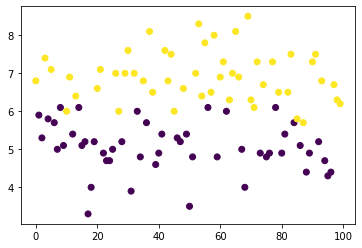

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [7]:
clf.fit(X,y)

LogisticRegression()

<AxesSubplot:>

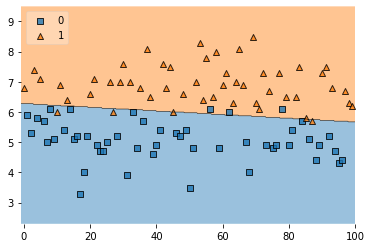

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [9]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.9200000000000002

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [11]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

# here actually i apply the polynomial logistic regression on the linearly classified dataset
# that's why my model accuracy become decrease

0.8400000000000001

In [12]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

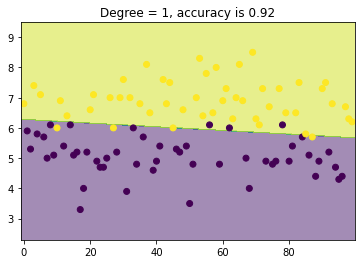

In [13]:
plot_decision_boundary(X,y)

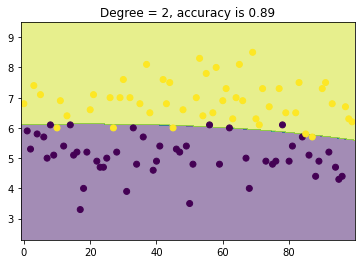

In [14]:
plot_decision_boundary(X,y,degree=2)

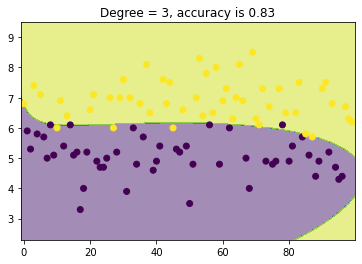

In [15]:
plot_decision_boundary(X,y,degree=3)

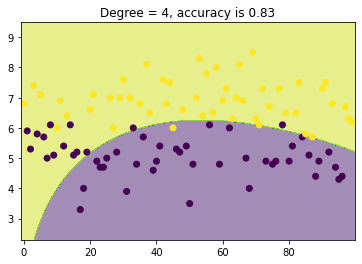

In [16]:
plot_decision_boundary(X,y,degree=4)

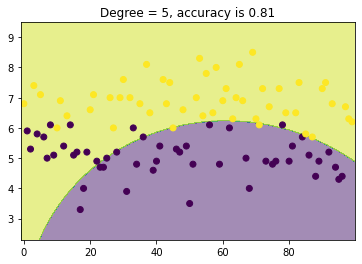

In [17]:
plot_decision_boundary(X,y,degree=5)

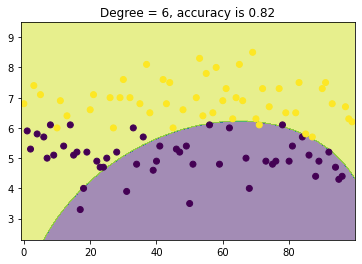

In [18]:
plot_decision_boundary(X,y,degree=6)

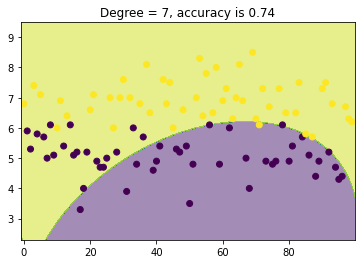

In [19]:
plot_decision_boundary(X,y,degree=7)

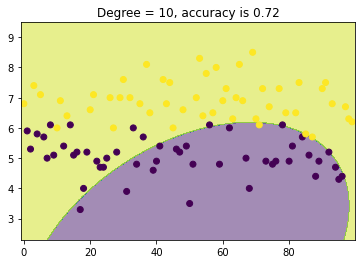

In [20]:
plot_decision_boundary(X,y,degree=10)

***Actually i had not found the related data so i just apply the polynomial logistic regression on the data which is actually suitable for Logistic Regression because the data points are in this dataset is linearly classified.So please ignore it and just focus on the code and concept.***

[Linear models sklearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

[Logistic Regression library sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Source Link](https://github.com/campusx-official/100-days-of-machine-learning/tree/main/day60-logistic-regression-contd)